# Sentiment Analysis

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca file Excel
file_path = 'label_sentiment.xlsx'
data = pd.read_excel(file_path)

data.head()

,verbatim,Label
0,Kurang aqurat.masak pakt intrnet masih 6 gb pa...,negative
1,Bagaimana selalu gagal memasukan voucher terus...,negative
2,Enak exis sllu banyak bonus2...,positive
3,Mengapa jaringan AXIS kurang enak dipakai bias...,negative
4,Harga kuota sangat mahal boros lagi Jadi pela...,negative


## Data Exploration

In [3]:
# Informasi dataset
data.info()

# Statistik deskriptif
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   verbatim  3941 non-null   object
 1   Label     3943 non-null   object
dtypes: object(2)
memory usage: 61.7+ KB


,verbatim,Label
count,3941,3943
unique,3204,3
top,Lumayan,negative
freq,101,1396


In [4]:
# Cek missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
verbatim    2
Label       0
dtype: int64


In [5]:
# Cek duplikasi
duplicates = data.duplicated().sum()
print(f"Jumlah duplikasi: {duplicates}")

Jumlah duplikasi: 712


### Data Preprocessing

In [6]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download resources NLTK jika diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Fungsi preprocessing
def preprocess_text(text):
    if not isinstance(text, str):  
        text = str(text)
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    words = word_tokenize(text)  
    stop_words = set(stopwords.words('indonesian'))  
    words = [word for word in words if word not in stop_words]  
    lemmatizer = WordNetLemmatizer()  
    words = [lemmatizer.lemmatize(word) for word in words]  
    return ' '.join(words)

# Baca file Excel
data = pd.read_excel('label_sentiment.xlsx')

# Pastikan kolom 'verbatim' ada
if 'verbatim' in data.columns:
    # Tangani nilai kosong dan konversi ke string
    data['verbatim'] = data['verbatim'].fillna('').astype(str)
    # Terapkan fungsi preprocessing
    data['Cleaned_Text'] = data['verbatim'].apply(preprocess_text)
else:
    raise ValueError("Kolom 'verbatim' tidak ditemukan dalam dataset.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mades\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mades\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mades\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
print("\nDataset Setelah Preprocessing:")
print(data[['verbatim', 'Cleaned_Text']].head())


Dataset Setelah Preprocessing:
                                            verbatim  \
0  Kurang aqurat.masak pakt intrnet masih 6 gb pa...   
1  Bagaimana selalu gagal memasukan voucher terus...   
2                    Enak exis sllu banyak bonus2...   
3  Mengapa jaringan AXIS kurang enak dipakai bias...   
4  Harga kuota sangat mahal boros lagi  Jadi pela...   

                                        Cleaned_Text  
0  aquratmasak pakt intrnet gb pagi masak siang h...  
1              gagal memasukan voucher voucher gagal  
2                               enak exis sllu bonus  
3  jaringan axis enak dipakai enak banget kalo di...  
4  harga kuota mahal boros pelanggan keberatan ud...  


## EDA

C:\Users\mades\AppData\Local\Temp\ipykernel_12536\870584737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Label'], palette='viridis')


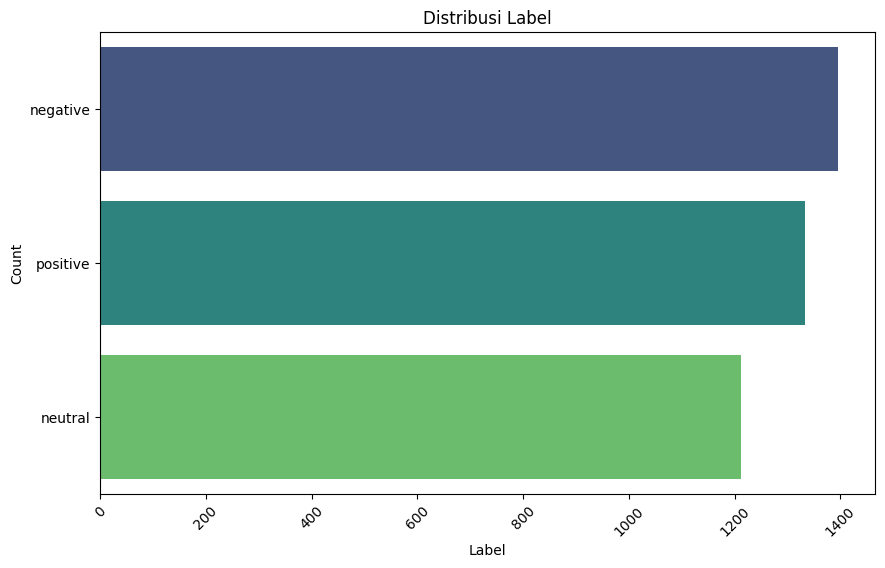

In [8]:
# Visualisasi distribusi label
plt.figure(figsize=(10, 6))
sns.countplot(data['Label'], palette='viridis')  
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

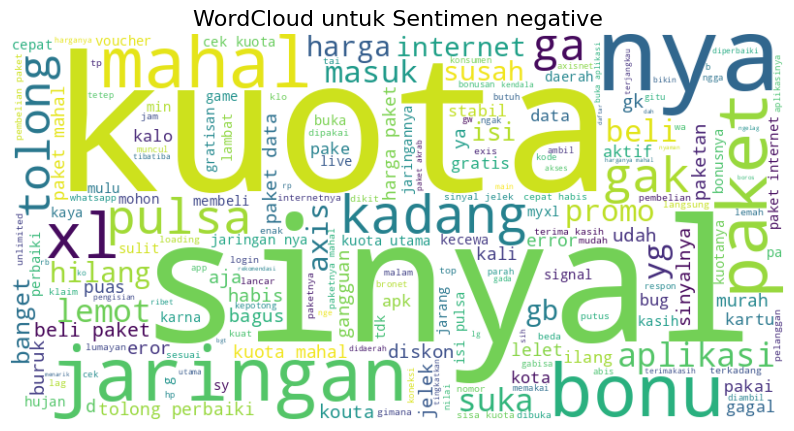

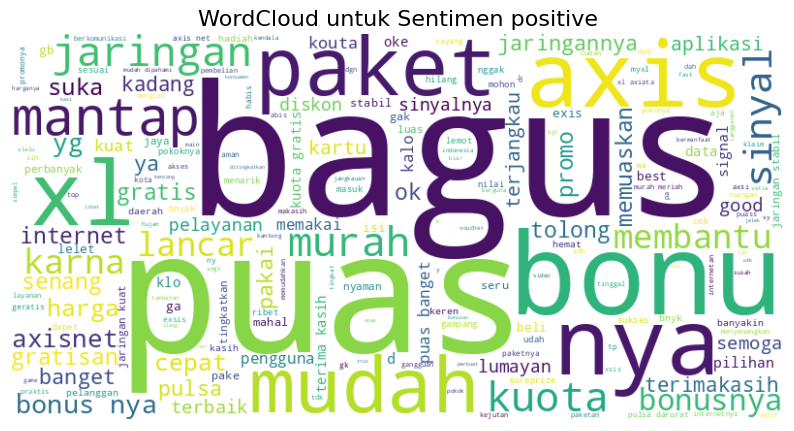

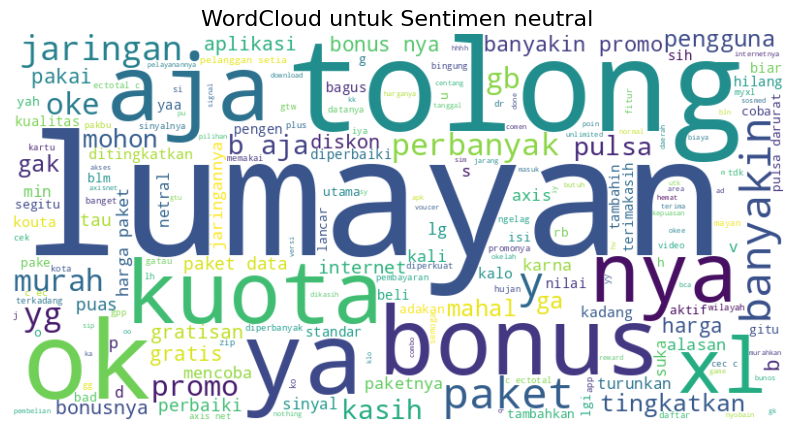

In [9]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

if 'Label' in data.columns and 'Cleaned_Text' in data.columns:
    for sentiment in data['Label'].unique():
        sentiment_data = data[data['Label'] == sentiment]
        combined_text = ' '.join(sentiment_data['Cleaned_Text'])
        generate_wordcloud(combined_text, f'WordCloud untuk Sentimen {sentiment}')
else:
    raise ValueError("Kolom 'Label' atau 'Cleaned_Text' tidak ditemukan. Pastikan preprocessing telah selesai.")

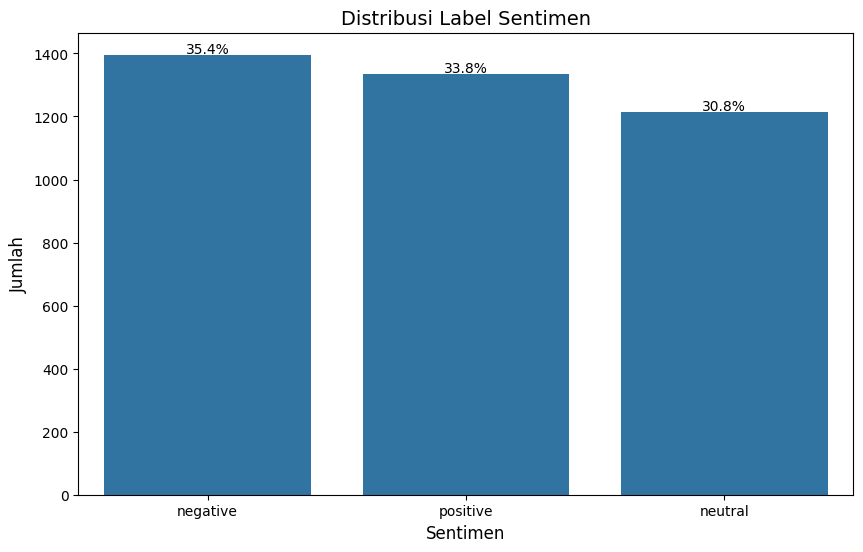

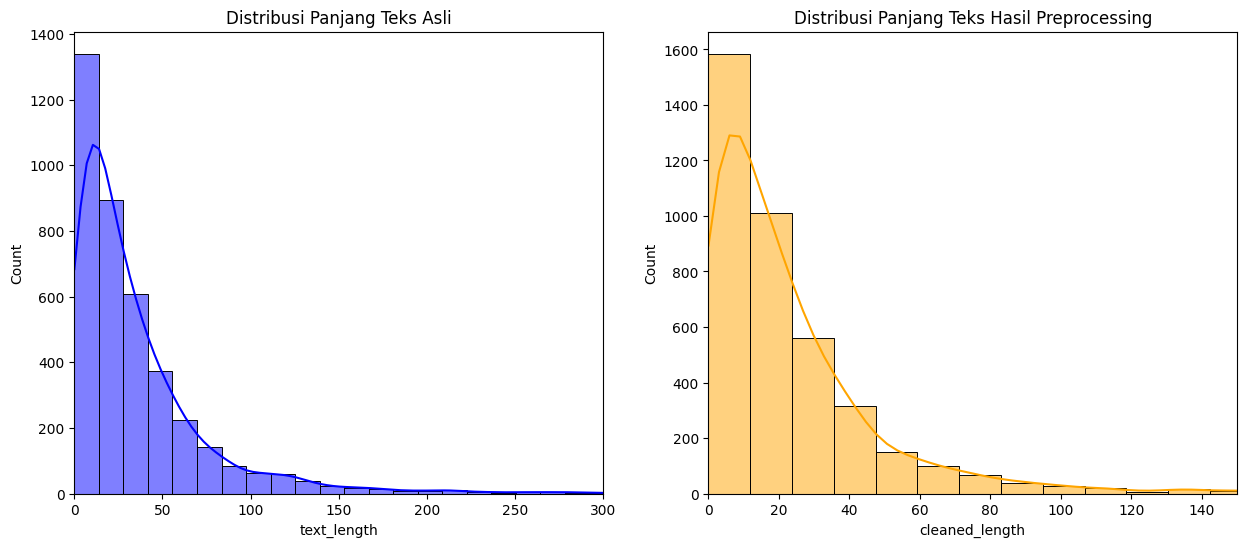

Contoh nilai non-text dalam 'verbatim':
                                            verbatim     Label
0  Kurang aqurat.masak pakt intrnet masih 6 gb pa...  negative
1  Bagaimana selalu gagal memasukan voucher terus...  negative
2                    Enak exis sllu banyak bonus2...  positive 



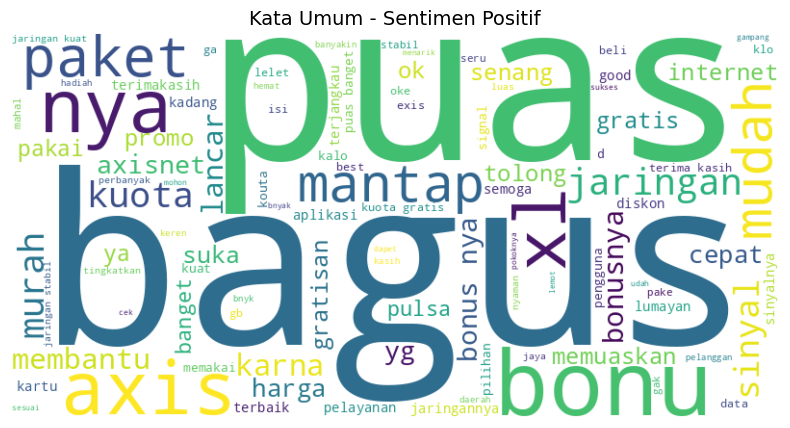

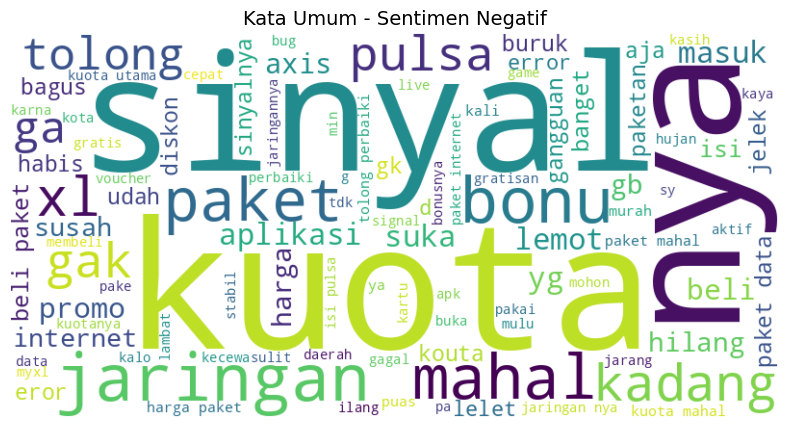

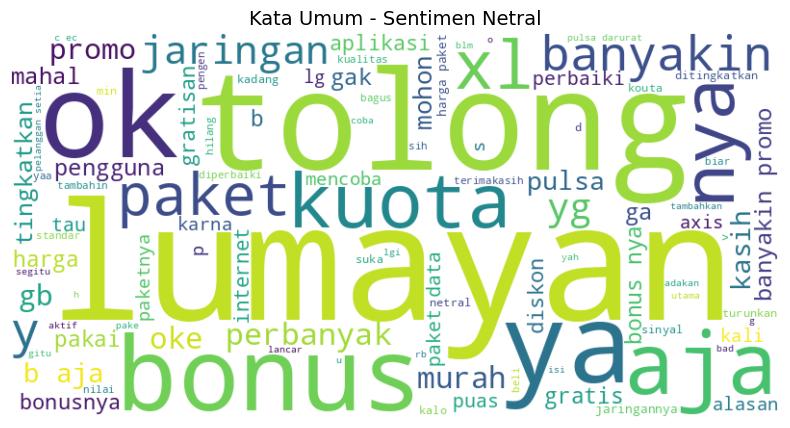

C:\Users\mades\AppData\Local\Temp\ipykernel_12536\1100243358.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count[1] for count in word_counts],


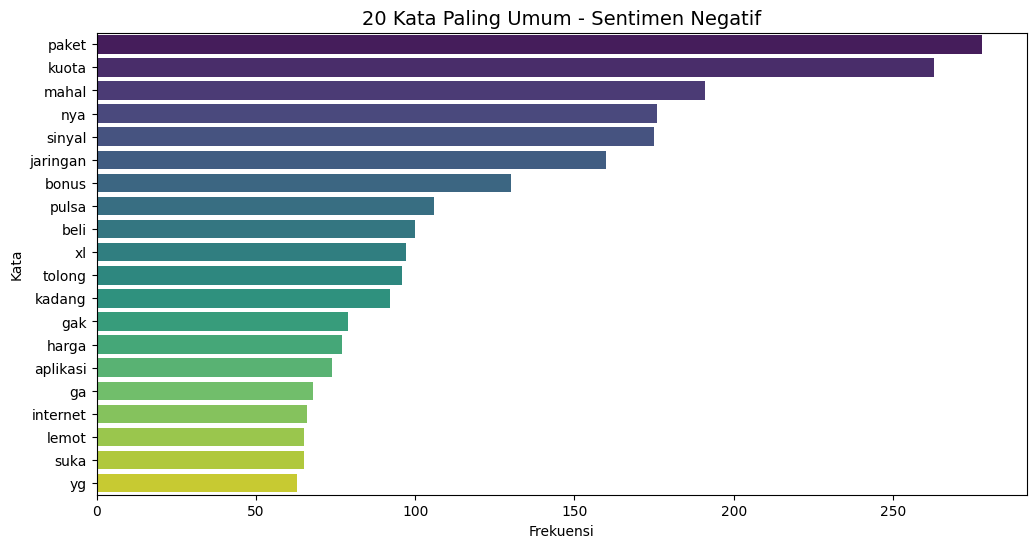

C:\Users\mades\AppData\Local\Temp\ipykernel_12536\1100243358.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count[1] for count in word_counts],


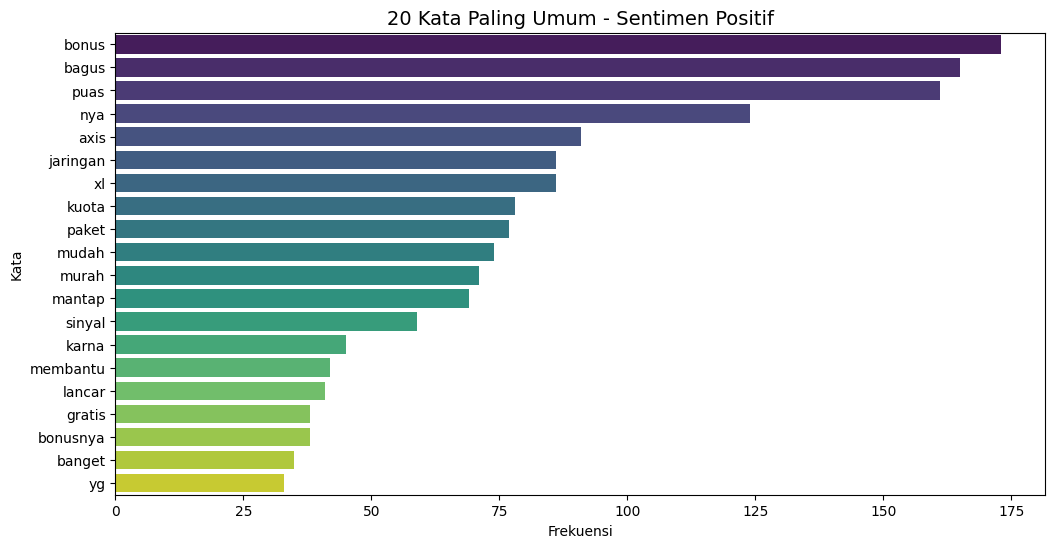

C:\Users\mades\AppData\Local\Temp\ipykernel_12536\1100243358.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count[1] for count in word_counts],


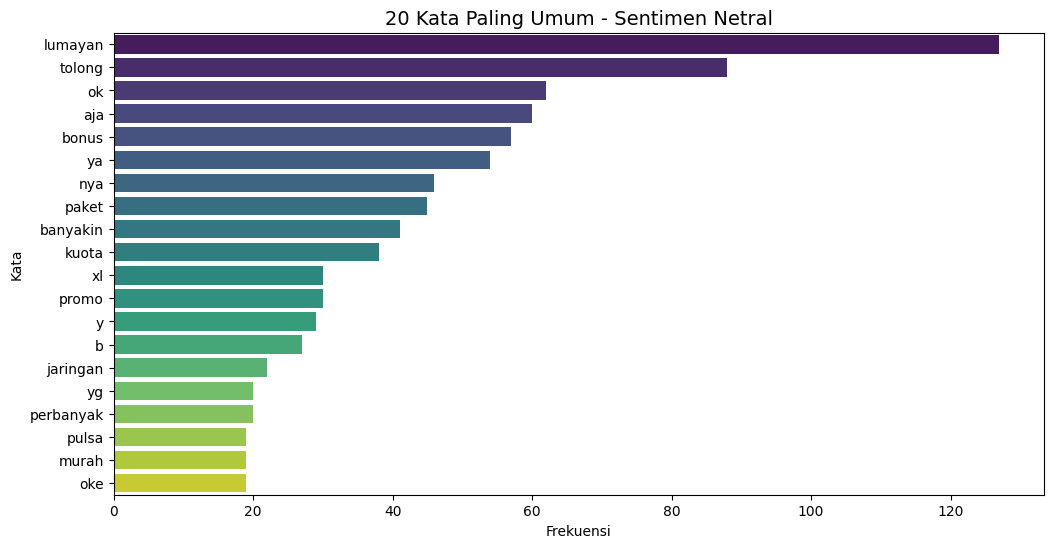

Kata Unik Sentimen Negatif (1469): ['awan', 'gbnyatanya', 'gausah', 'niat', 'kostumer', 'ak', 'infokan', 'mkin', 'anjeng', 'berulang']...
Kata Unik Sentimen Positif (763): ['lagging', 'bangetttt', 'tejangkau', 'bgussmga', 'dehh', 'volta', 'kui', 'pqket', 'naikan', 'banyakngratisan']...


In [10]:
from collections import Counter

if 'Label' not in data.columns:
    raise ValueError("Kolom 'Label' tidak ditemukan. Pastikan dataset memiliki kolom sentimen bernama 'Label'.")

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Label', data=data, order=data['Label'].value_counts().index)
plt.title('Distribusi Label Sentimen', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

data['text_length'] = data['verbatim'].apply(lambda x: len(str(x)))
data['cleaned_length'] = data['Cleaned_Text'].apply(lambda x: len(str(x)))

fig, axes = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(data['text_length'], bins=50, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribusi Panjang Teks Asli')
axes[0].set_xlim(0, 300)  # Batasi rentang agar lebih jelas

sns.histplot(data['cleaned_length'], bins=50, ax=axes[1], kde=True, color='orange')
axes[1].set_title('Distribusi Panjang Teks Hasil Preprocessing')
axes[1].set_xlim(0, 150)

plt.show()

non_text_values = data[data['verbatim'].apply(lambda x: not x.isalpha())]
print("Contoh nilai non-text dalam 'verbatim':")
print(non_text_values[['verbatim', 'Label']].head(3), "\n")

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, 
                          height=400,
                          background_color='white',
                          max_words=100
                         ).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

positive_text = ' '.join(data[data['Label'] == 'positive']['Cleaned_Text'])
negative_text = ' '.join(data[data['Label'] == 'negative']['Cleaned_Text'])
neutral_text  = ' '.join(data[data['Label'] == 'neutral']['Cleaned_Text'])

plot_wordcloud(positive_text, 'Kata Umum - Sentimen Positif')
plot_wordcloud(negative_text, 'Kata Umum - Sentimen Negatif')
plot_wordcloud(neutral_text,  'Kata Umum - Sentimen Netral')

def plot_top_words(text, title, n=20):
    words = text.split()
    word_counts = Counter(words).most_common(n)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x=[count[1] for count in word_counts], 
                y=[count[0] for count in word_counts], 
                palette='viridis')
    plt.title(title, fontsize=14)
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.show()

# Plot 20 kata paling umum per sentimen
plot_top_words(negative_text, '20 Kata Paling Umum - Sentimen Negatif')
plot_top_words(positive_text, '20 Kata Paling Umum - Sentimen Positif')
plot_top_words(neutral_text, '20 Kata Paling Umum - Sentimen Netral')

# 5.5. Perbandingan Kata Kunci (Kata Unik Antara Positif & Negatif)
negative_words = negative_text.split()
positive_words = positive_text.split()

negative_freq = Counter(negative_words)
positive_freq = Counter(positive_words)

# Cari kata unik di setiap kategori
unique_negative = set(negative_words) - set(positive_words)
unique_positive = set(positive_words) - set(negative_words)

print(f"Kata Unik Sentimen Negatif ({len(unique_negative)}): {list(unique_negative)[:10]}...")
print(f"Kata Unik Sentimen Positif ({len(unique_positive)}): {list(unique_positive)[:10]}...")

## Data Modelling

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
if 'Cleaned_Text' in data.columns and 'Label' in data.columns:
    # Split data menjadi train dan test
    X = data['Cleaned_Text']
    y = data['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
else:
    raise ValueError("Kolom 'Cleaned_Text' atau 'Label' tidak ditemukan. Pastikan preprocessing telah selesai.")

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Definisikan beberapa model 
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42, kernel='linear'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

Model: Logistic Regression
Accuracy: 0.7757
              precision    recall  f1-score   support

    negative       0.80      0.77      0.79       279
     neutral       0.71      0.83      0.77       243
    positive       0.82      0.73      0.77       267

    accuracy                           0.78       789
   macro avg       0.78      0.78      0.78       789
weighted avg       0.78      0.78      0.78       789

--------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.7617
              precision    recall  f1-score   support

    negative       0.78      0.76      0.77       279
     neutral       0.71      0.81      0.76       243
    positive       0.80      0.72      0.76       267

    accuracy                           0.76       789
   macro avg       0.76      0.76      0.76       789
weighted avg       0.77      0.76      0.76       789

--------------------------------------------------
Model: Random Forest
Accuracy: 0.7389
       

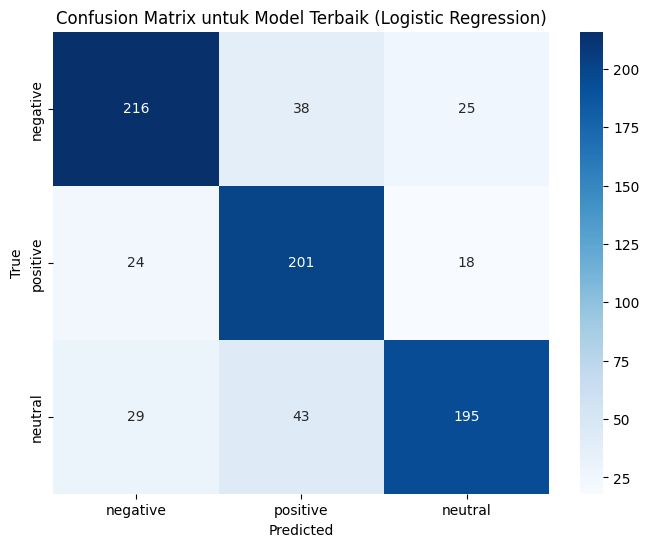

In [15]:
best_model = None
best_accuracy = 0
best_model_name = None  

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name  

print(f"Model terbaik adalah: {best_model_name} dengan akurasi: {best_accuracy:.4f}")

y_pred_best = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Label'].unique(), yticklabels=data['Label'].unique())
plt.title(f'Confusion Matrix untuk Model Terbaik ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# Simpan model terbaik
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model_name

print(f"Model terbaik adalah: {best_model} dengan akurasi: {best_accuracy:.4f}")

Model terbaik adalah: LogisticRegression(max_iter=1000, random_state=42) dengan akurasi: 0.7757


### Word2Vec

Accuracy: 0.6907
              precision    recall  f1-score   support

    negative       0.63      0.78      0.70       279
     neutral       0.77      0.72      0.75       243
    positive       0.69      0.57      0.63       267

    accuracy                           0.69       789
   macro avg       0.70      0.69      0.69       789
weighted avg       0.70      0.69      0.69       789



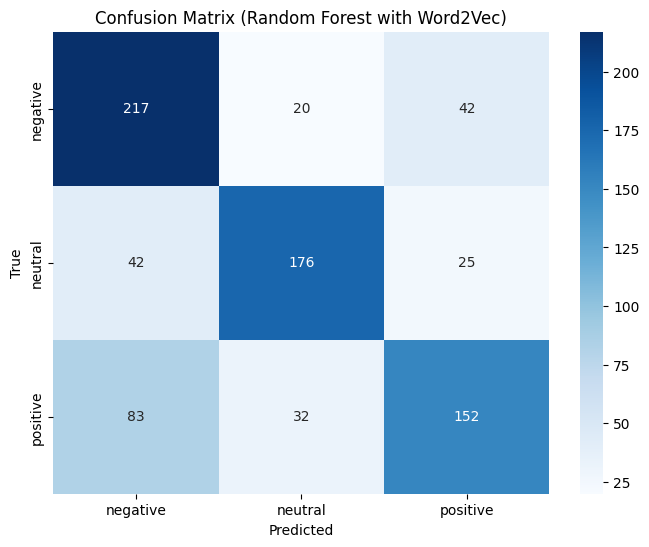

In [17]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'Cleaned_Text' in data.columns and 'Label' in data.columns:
    data['Tokenized_Text'] = data['Cleaned_Text'].apply(lambda x: x.split())
else:
    raise ValueError("Kolom 'Cleaned_Text' atau 'Label' tidak ditemukan. Pastikan preprocessing telah selesai.")

X = data['Tokenized_Text']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=2, workers=4, sg=1, seed=42)

def get_average_word2vec(tokens_list, model, vector_size):
    vectors = []
    for tokens in tokens_list:
        word_vectors = [model.wv[word] for word in tokens if word in model.wv]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

X_train_vectors = get_average_word2vec(X_train, word2vec_model, vector_size=100)
X_test_vectors = get_average_word2vec(X_test, word2vec_model, vector_size=100)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_vectors, y_train)

y_pred = rf_model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Random Forest with Word2Vec)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Implementasi Model

In [18]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Fungsi preprocessing
def preprocess_text(text):
    if not isinstance(text, str):  
        text = str(text)
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    words = word_tokenize(text)  
    stop_words = set(stopwords.words('english'))  
    words = [word for word in words if word not in stop_words]  
    lemmatizer = WordNetLemmatizer()  
    words = [lemmatizer.lemmatize(word) for word in words]  
    return ' '.join(words)

test_data_path = 'test.xlsx'  
test_data = pd.read_excel(test_data_path)

if 'verbatim' in test_data.columns:
    test_data['verbatim'] = test_data['verbatim'].fillna('').astype(str)
    test_data['Cleaned_Text'] = test_data['verbatim'].apply(preprocess_text)
else:
    raise ValueError("Kolom 'verbatim' tidak ditemukan dalam dataset test.")

X_test_transformed = vectorizer.transform(test_data['Cleaned_Text'])

test_predictions = best_model.predict(X_test_transformed)

test_data['Predicted_Label'] = test_predictions

output_file = 'test_predictions_new.xlsx'
test_data.to_excel(output_file, index=False)
print(f"Hasil prediksi telah disimpan ke file: {output_file}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mades\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mades\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mades\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 